In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:


def backfitting(X, y, max_iter=100, tol=1e-6):
    """
    Perform backfitting for an additive model.
    
    Parameters:
    - X: np.ndarray, shape (n_samples, n_features)
        The input data.
    - y: np.ndarray, shape (n_samples,)
        The response variable.
    - max_iter: int, optional
        Maximum number of iterations (default=100).
    - tol: float, optional
        Tolerance for convergence (default=1e-6).
    
    Returns:
    - F: np.ndarray, shape (n_samples, n_features)
        Estimated functions f_j(x_{ij}).
    """
    
    n_samples, n_features = X.shape
    F = np.zeros((n_samples, n_features))  # Initialize functions F_j(x_{ij}) to zero
    
    for iteration in range(max_iter):
        F_old = F.copy()  # Save the old estimates
        
        for j in range(n_features):
            # Calculate residual by subtracting all other functions
            residual = y - np.sum(F, axis=1) + F[:, j]
            
            # Fit a model to estimate the function f_j(x_{ij})
            model = LinearRegression().fit(X[:, [j]], residual)
            F[:, j] = model.predict(X[:, [j]])
        
        # Check for convergence
        if np.linalg.norm(F - F_old) < tol:
            print(f"Convergence reached after {iteration + 1} iterations.")
            break
    else:
        print("Maximum iterations reached without convergence.")
    
    return F

# Example usage:
# Generate synthetic data
np.random.seed(0)
n_samples = 100
X = np.random.rand(n_samples, 3)
y = 3 * X[:, 0] + 2 * X[:, 1] + X[:, 2] + np.random.randn(n_samples)

# Perform backfitting
F = backfitting(X, y)

# Print the estimated functions
print("Estimated functions (F):")
print(F)


Convergence reached after 6 iterations.
Estimated functions (F):
[[ 2.99026532e+00  4.52656388e-01  1.00891887e-01]
 [ 2.98008059e+00 -1.24569410e-01  1.54944663e-01]
 [ 2.70204188e+00  8.02284326e-01  5.53182178e-01]
 [ 2.56173280e+00  6.04193699e-01  8.31764904e-03]
 [ 3.04009924e+00  8.69253661e-01 -5.65485262e-01]
 [ 1.79389160e+00 -9.23355988e-01  3.88955137e-01]
 [ 3.58456816e+00  7.59198781e-01  5.71924976e-01]
 [ 3.63899068e+00 -4.96784160e-02  3.23673496e-01]
 [ 1.87459874e+00  3.03628330e-01 -4.74855070e-01]
 [ 4.01605527e+00  6.98495054e-02 -1.34842661e-01]
 [ 2.25366080e+00  5.69561587e-01 -8.28481220e-02]
 [ 3.04110827e+00 -9.26184548e-01  1.19530090e-01]
 [ 3.15425011e+00  2.58115018e-01  5.28224481e-01]
 [ 3.33492913e+00 -2.51577487e-01 -1.06807866e-01]
 [ 3.37590030e+00 -8.44143716e-01  1.81102855e-01]
 [ 3.30595182e+00 -5.46839192e-01 -4.92935421e-01]
 [ 2.38548859e+00 -2.43255986e-01  6.00784080e-02]
 [ 2.70467026e+00  9.93549794e-01 -5.26624133e-01]
 [ 2.10937881e+00

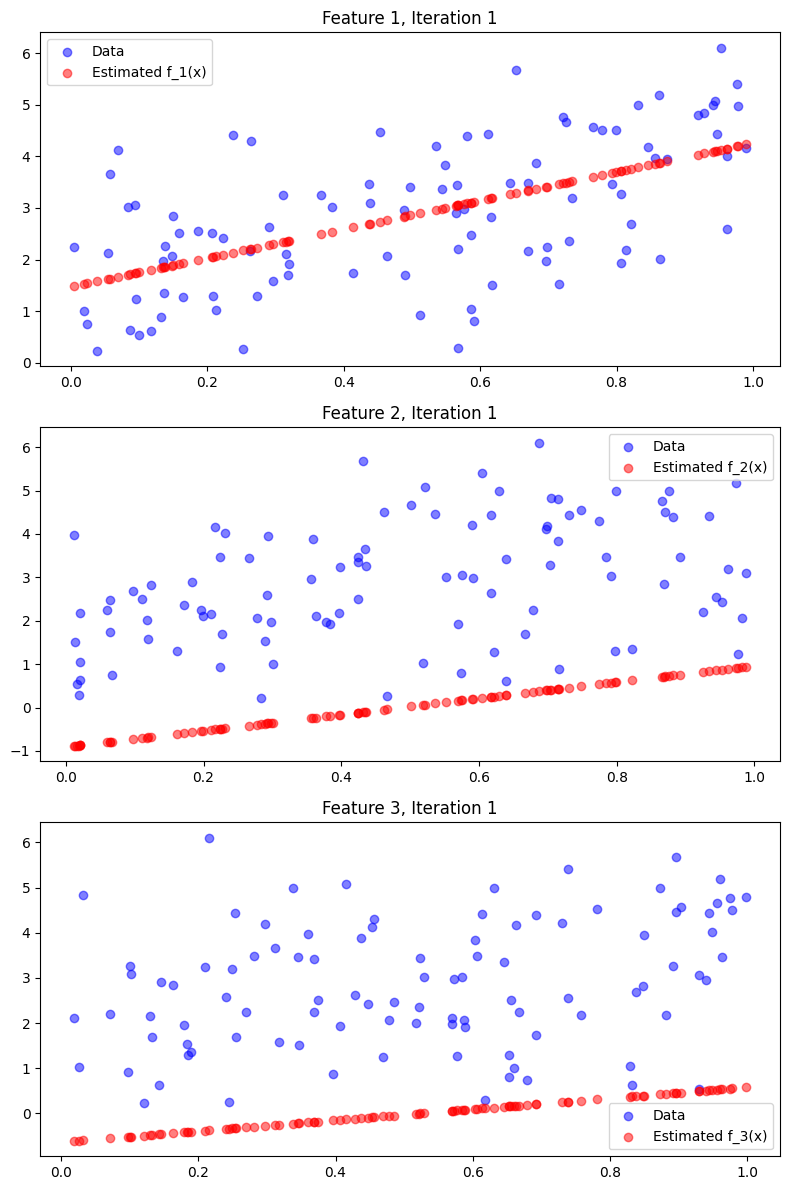

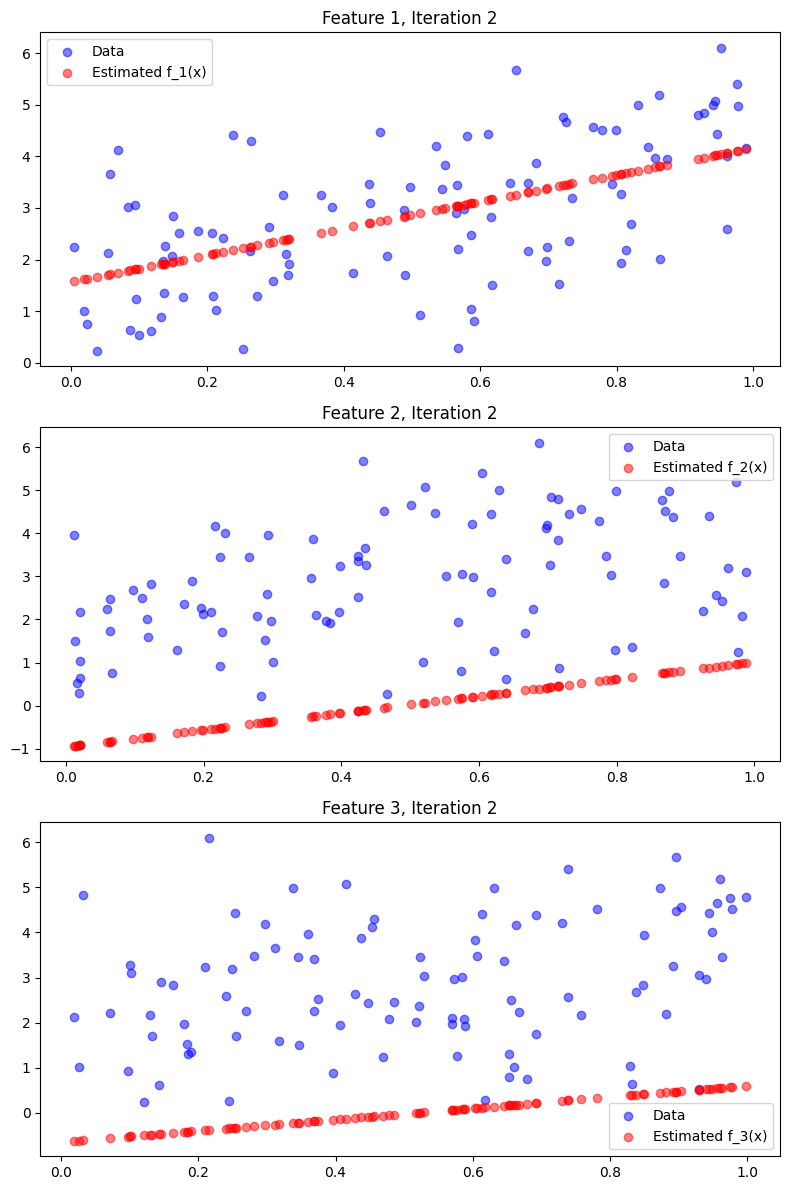

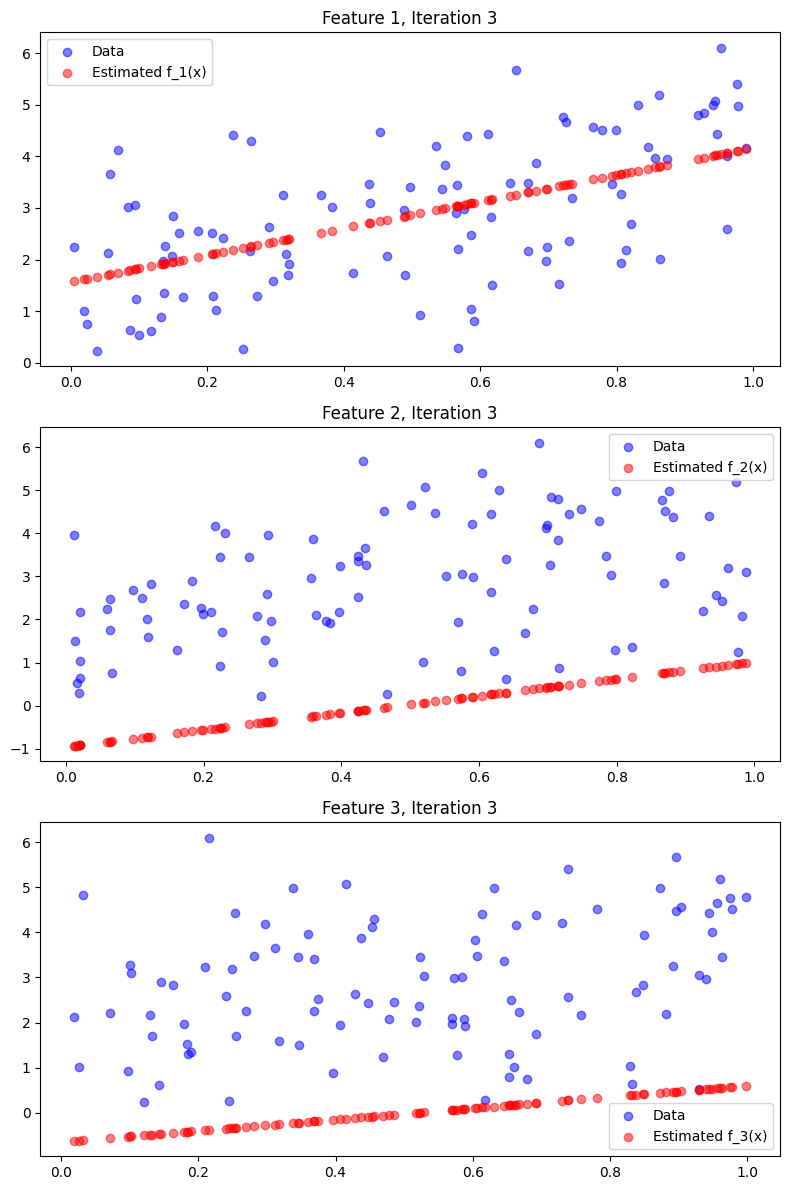

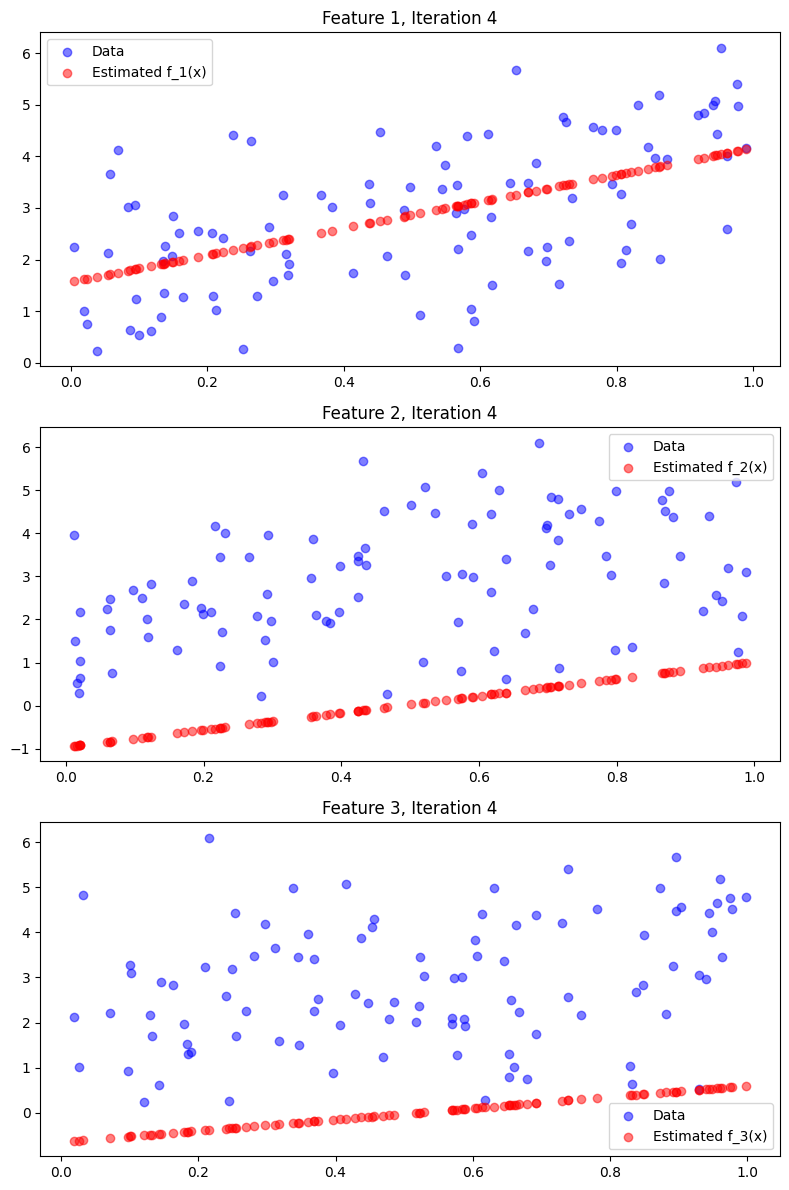

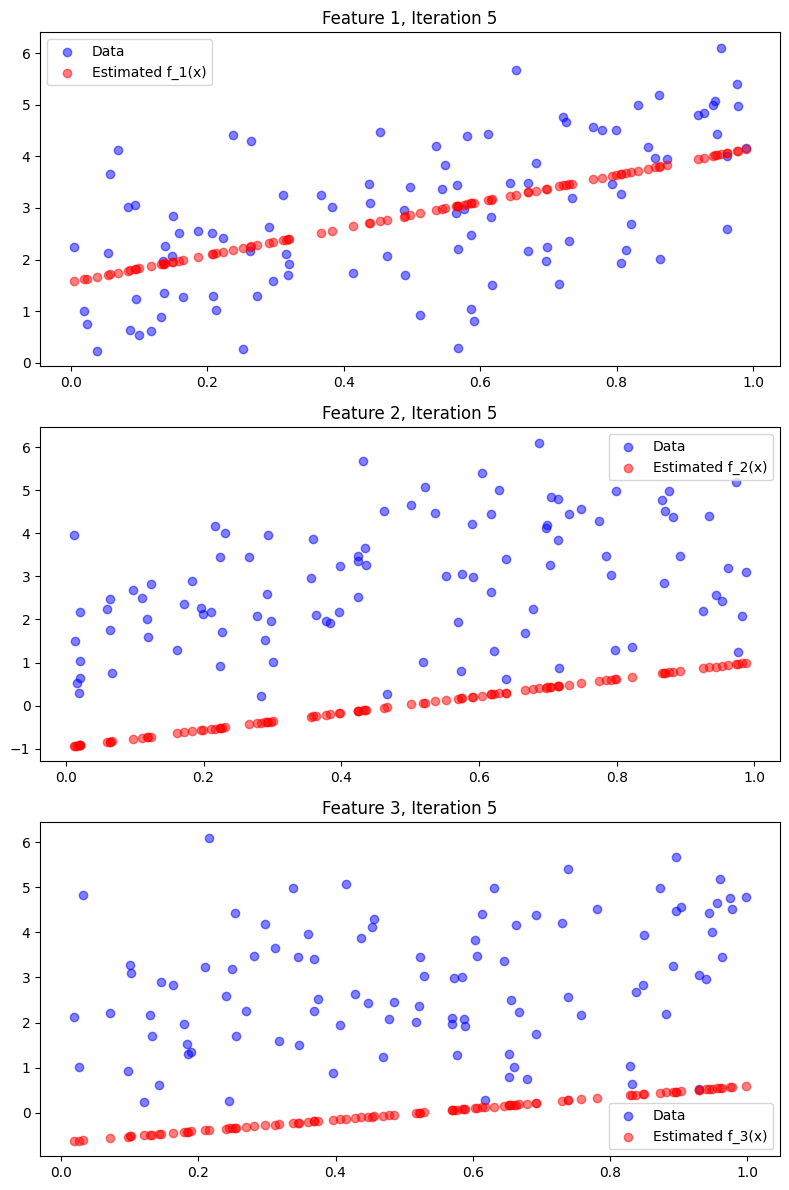

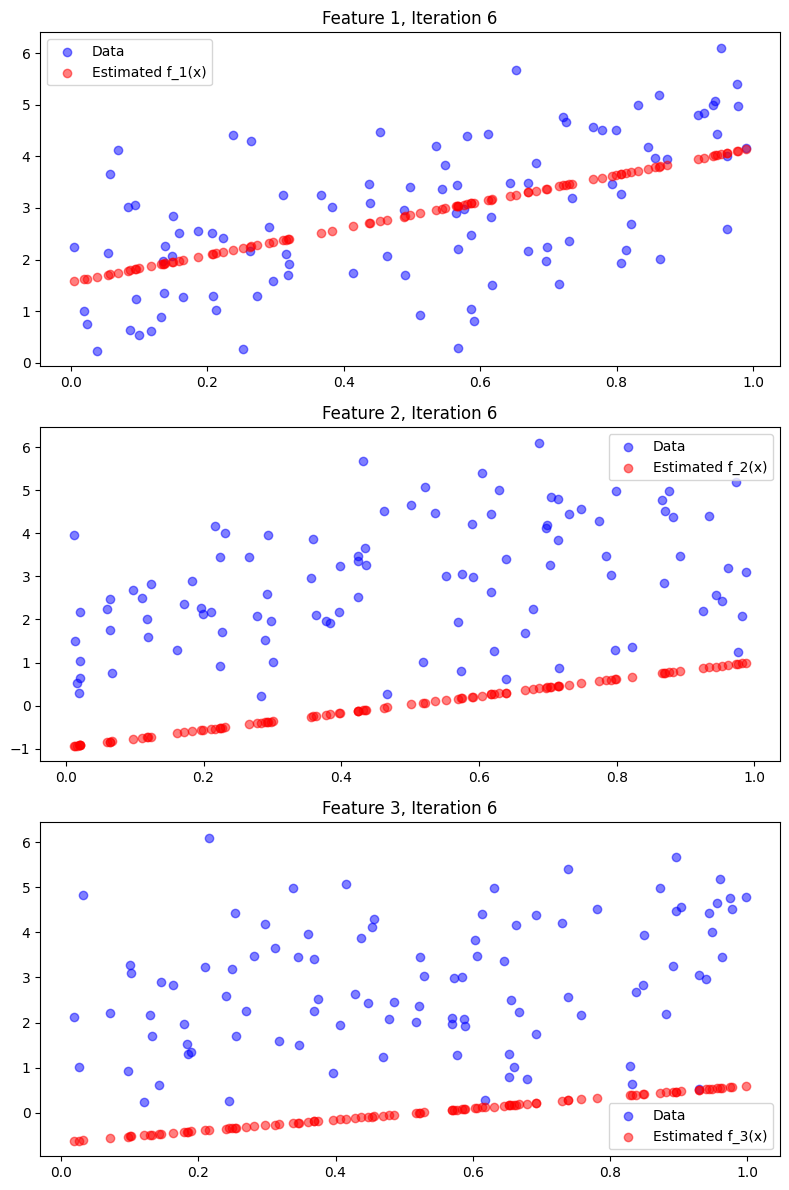

Convergence reached after 6 iterations.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def backfitting_with_plots(X, y, max_iter=100, tol=1e-6):
    """
    Perform backfitting for an additive model and plot each iteration until convergence.
    
    Parameters:
    - X: np.ndarray, shape (n_samples, n_features)
        The input data.
    - y: np.ndarray, shape (n_samples,)
        The response variable.
    - max_iter: int, optional
        Maximum number of iterations (default=100).
    - tol: float, optional
        Tolerance for convergence (default=1e-6).
    
    Returns:
    - F: np.ndarray, shape (n_samples, n_features)
        Estimated functions f_j(x_{ij}).
    """
    
    n_samples, n_features = X.shape
    F = np.zeros((n_samples, n_features))  # Initialize functions F_j(x_{ij}) to zero
    
    for iteration in range(max_iter):
        F_old = F.copy()  # Save the old estimates
        
        for j in range(n_features):
            # Calculate residual by subtracting all other functions
            residual = y - np.sum(F, axis=1) + F[:, j]
            
            # Fit a model to estimate the function f_j(x_{ij})
            model = LinearRegression().fit(X[:, [j]], residual)
            F[:, j] = model.predict(X[:, [j]])
        
        # Plot the current iteration
        plot_iteration(X, y, F, iteration)
        
        # Check for convergence
        if np.linalg.norm(F - F_old) < tol:
            print(f"Convergence reached after {iteration + 1} iterations.")
            break
    else:
        print("Maximum iterations reached without convergence.")
    
    return F

def plot_iteration(X, y, F, iteration):
    """
    Plot the estimated functions for the current iteration.
    
    Parameters:
    - X: np.ndarray, shape (n_samples, n_features)
        The input data.
    - y: np.ndarray, shape (n_samples,)
        The response variable.
    - F: np.ndarray, shape (n_samples, n_features)
        The estimated functions from backfitting.
    - iteration: int
        The current iteration number.
    """
    
    n_features = X.shape[1]
    fig, axes = plt.subplots(n_features, 1, figsize=(8, 4 * n_features))
    if n_features == 1:
        axes = [axes]  # Ensure axes is iterable for single feature case
    
    for j in range(n_features):
        axes[j].scatter(X[:, j], y, color='blue', label='Data', alpha=0.5)
        axes[j].scatter(X[:, j], F[:, j], color='red', label=f'Estimated f_{j + 1}(x)', alpha=0.5)
        axes[j].set_title(f'Feature {j + 1}, Iteration {iteration + 1}')
        axes[j].legend()
    
    plt.tight_layout()
    plt.savefig(f"backfitting_iteration_{iteration + 1}.png")
    plt.show()

# Example usage:
# Generate synthetic data
np.random.seed(0)
n_samples = 100
X = np.random.rand(n_samples, 3)
y = 3 * X[:, 0] + 2 * X[:, 1] + X[:, 2] + np.random.randn(n_samples)

# Perform backfitting with plotting
F = backfitting_with_plots(X, y)
